In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# Load datasets
minute_calories = pd.read_csv('minuteCaloriesWide_merged.csv')
minute_intensities = pd.read_csv('minuteIntensitiesWide_merged.csv')
minute_steps = pd.read_csv('minuteStepsWide_merged.csv')

In [18]:
print(minute_calories.shape)
print(minute_intensities.shape)
print(minute_steps.shape)

(21645, 62)
(21645, 62)
(21645, 62)


In [48]:
# Perform the melting operation on 'minuteIntensitiesWide_merged' dataset
melted_data1 = pd.melt(minute_intensities, id_vars=['Id', 'ActivityHour'], var_name='Minute', value_name='Intensities')

# Adjust the 'Minute' column to extract the minute as a number
melted_data1['Minute'] = melted_data1['Minute'].str.extract('(\d+)').astype(int)

# Display the first few rows of the melted dataset
melted_data1.head()


,Id,ActivityHour,Minute,Intensities
0,1503960366,4/13/2016 12:00:00 AM,0,1
1,1503960366,4/13/2016 1:00:00 AM,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0


In [49]:
melted_data1.shape

(1298700, 4)

In [50]:
# Perform the melting operation on 'minuteCaloriesWide_merged' dataset
melted_data2 = pd.melt(minute_calories, id_vars=['Id', 'ActivityHour'], var_name='Minute', value_name='Calories')

# Adjust the 'Minute' column to extract the minute as a number
melted_data2['Minute'] = melted_data2['Minute'].str.extract('(\d+)').astype(int)

# Display the first few rows of the melted dataset
melted_data2.head()

,Id,ActivityHour,Minute,Calories
0,1503960366,4/13/2016 12:00:00 AM,0,1.8876
1,1503960366,4/13/2016 1:00:00 AM,0,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0,0.7865


In [52]:
melted_data2.shape

(1298700, 4)

In [53]:
# Perform the melting operation 'minuteStepsWide_merged' dataset
melted_data3 = pd.melt(minute_steps, id_vars=['Id', 'ActivityHour'], var_name='Minute', value_name='Steps')

# Adjust the 'Minute' column to extract the minute as a number
melted_data3['Minute'] = melted_data3['Minute'].str.extract('(\d+)').astype(int)

# Display the first few rows of the melted dataset
melted_data3.head()

,Id,ActivityHour,Minute,Steps
0,1503960366,4/13/2016 12:00:00 AM,0,4
1,1503960366,4/13/2016 1:00:00 AM,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0


In [54]:
melted_data3.shape

(1298700, 4)

In [55]:
# Merge datasets: Start with minutely_calories as the base, then merge others one by one
# Using an outer join to ensure no data is missed
minute_merged_data_wide = melted_data1.merge(melted_data2, on=['Id', 'ActivityHour','Minute'], how='outer', suffixes=('', '_calories'))

# Merging minutely_steps
minute_merged_data_wide = minute_merged_data_wide.merge(melted_data3, on=['Id', 'ActivityHour','Minute'], how='outer', suffixes=('', '_steps'))

# Check for duplicates
duplicates = minute_merged_data_wide.duplicated().sum()

# Overview of the merged dataset
merged_overview = {
    'Number of rows': minute_merged_data_wide.shape[0],
    'Number of columns': minute_merged_data_wide.shape[1],
    'Number of duplicates': duplicates
}

print(merged_overview)
minute_merged_data_wide.head()

{'Number of rows': 1298700, 'Number of columns': 6, 'Number of duplicates': 0}


,Id,ActivityHour,Minute,Intensities,Calories,Steps
0,1503960366,4/13/2016 12:00:00 AM,0,1,1.8876,4
1,1503960366,4/13/2016 1:00:00 AM,0,0,0.7865,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0.7865,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0.7865,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0.7865,0


In [56]:
minute_merged_data_wide.to_csv("minute_merged_data_wide.csv")

Cleaning the Dataset

In [58]:
df = pd.read_csv("minute_merged_data_wide.csv",index_col = 0)
df.head()

,Id,ActivityHour,Minute,Intensities,Calories,Steps
0,1503960366,4/13/2016 12:00:00 AM,0,1,1.8876,4
1,1503960366,4/13/2016 1:00:00 AM,0,0,0.7865,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0.7865,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0.7865,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0.7865,0


In [59]:
df.shape

(1298700, 6)

In [60]:
df.isnull().sum()

Id              0
ActivityHour    0
Minute          0
Intensities     0
Calories        0
Steps           0
dtype: int64

In [62]:
df.info

<bound method DataFrame.info of                  Id           ActivityHour  Minute  Intensities  Calories  \
0        1503960366  4/13/2016 12:00:00 AM       0            1    1.8876   
1        1503960366   4/13/2016 1:00:00 AM       0            0    0.7865   
2        1503960366   4/13/2016 2:00:00 AM       0            0    0.7865   
3        1503960366   4/13/2016 3:00:00 AM       0            0    0.7865   
4        1503960366   4/13/2016 4:00:00 AM       0            0    0.7865   
...             ...                    ...     ...          ...       ...   
1298695  8877689391   5/13/2016 3:00:00 AM      59            0    1.2170   
1298696  8877689391   5/13/2016 4:00:00 AM      59            0    1.2170   
1298697  8877689391   5/13/2016 5:00:00 AM      59            0    1.2170   
1298698  8877689391   5/13/2016 6:00:00 AM      59            1    3.8944   
1298699  8877689391   5/13/2016 7:00:00 AM      59            0    1.3387   

         Steps  
0            4  
1        

In [63]:
# Define a function to split the ActivityHour column into ActivityDay and ActivityTime
def split_activity_hour(df, column_name='ActivityHour'):
    # Split the column into two parts: Date and Time
    split_columns = df[column_name].str.split(' ', expand=True)
    # Assign the split columns to the dataframe
    df['ActivityDay'] = pd.to_datetime(split_columns[0])  # Convert to datetime format
    df['ActivityTime'] = split_columns[1]
    # Drop the original ActivityHour column
    df.drop(column_name, axis=1, inplace=True)
    return df

In [64]:
# Apply the function to each dataset
df = split_activity_hour(df)
df.head()

,Id,Minute,Intensities,Calories,Steps,ActivityDay,ActivityTime
0,1503960366,0,1,1.8876,4,2016-04-13,12:00:00
1,1503960366,0,0,0.7865,0,2016-04-13,1:00:00
2,1503960366,0,0,0.7865,0,2016-04-13,2:00:00
3,1503960366,0,0,0.7865,0,2016-04-13,3:00:00
4,1503960366,0,0,0.7865,0,2016-04-13,4:00:00


In [65]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(r'([a-z])([A-Z])', r'\1_\2').str.replace(r'[^a-z0-9_]', '', regex=True)

# Display the first few rows of the dataframe to verify the new column names
df.head()

C:\Users\nishant32\AppData\Local\Temp\ipykernel_15084\3852263842.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace(r'([a-z])([A-Z])', r'\1_\2').str.replace(r'[^a-z0-9_]', '', regex=True)


,id,minute,intensities,calories,steps,activityday,activitytime
0,1503960366,0,1,1.8876,4,2016-04-13,12:00:00
1,1503960366,0,0,0.7865,0,2016-04-13,1:00:00
2,1503960366,0,0,0.7865,0,2016-04-13,2:00:00
3,1503960366,0,0,0.7865,0,2016-04-13,3:00:00
4,1503960366,0,0,0.7865,0,2016-04-13,4:00:00


In [66]:
# Rearrange the position of 'activityday' column to be adjacent to 'id' column
cols = list(df.columns)
cols.insert(1, cols.pop(cols.index('activityday')))  # Move 'activityday' and 'acivitytime' next to 'id'
cols.insert(2, cols.pop(cols.index('activitytime'))) 
df = df[cols]

# Display the first few rows of the dataframe to verify the rearrangement
df.head()

,id,activityday,activitytime,minute,intensities,calories,steps
0,1503960366,2016-04-13,12:00:00,0,1,1.8876,4
1,1503960366,2016-04-13,1:00:00,0,0,0.7865,0
2,1503960366,2016-04-13,2:00:00,0,0,0.7865,0
3,1503960366,2016-04-13,3:00:00,0,0,0.7865,0
4,1503960366,2016-04-13,4:00:00,0,0,0.7865,0


In [67]:
# Convert 'activityday' and 'activitytime' to datetime format
df['activityday'] = pd.to_datetime(df['activityday'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298700 entries, 0 to 1298699
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   id            1298700 non-null  int64         
 1   activityday   1298700 non-null  datetime64[ns]
 2   activitytime  1298700 non-null  object        
 3   minute        1298700 non-null  int64         
 4   intensities   1298700 non-null  int64         
 5   calories      1298700 non-null  float64       
 6   steps         1298700 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 79.3+ MB


In [68]:
# chcek if is there any duplicate values in dataset
duplicates = duplicates = df.duplicated().sum()
duplicates

282514

In [69]:
# Remove duplicate rows, keeping the first occurrence of each duplicate
df = df.drop_duplicates()

 Exploratory Data Analysis (minute - wide)

In [70]:
# Provide summary statistics
summary_statistics = df.describe()
summary_statistics

,id,minute,intensities,calories,steps
count,1.016186e+06,1.016186e+06,1.016186e+06,1.016186e+06,1.016186e+06
mean,4.873623e+09,2.949463e+01,2.565229e-01,1.758877e+00,6.826054e+00
std,2.407535e+09,1.731997e+01,5.752581e-01,1.563145e+00,2.023552e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,1.400000e+01,0.000000e+00,9.860400e-01,0.000000e+00
50%,4.558610e+09,3.000000e+01,0.000000e+00,1.260600e+00,0.000000e+00
75%,6.962181e+09,4.400000e+01,0.000000e+00,1.589380e+00,0.000000e+00
max,8.877689e+09,5.900000e+01,3.000000e+00,1.974995e+01,2.200000e+02


In [72]:
# Check the unique values in 'minute' to understand its distribution
unique_minutes = df['minute'].unique()

unique_minutes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [74]:
# For the purpose of demonstration, let's select the first date and a specific hour from the dataset
# First, let's check the unique activity days and times to choose a sample
unique_days = df['activityday'].unique()
unique_times = df['activitytime'].unique()

# Displaying the first few unique days and times to choose a sample for demonstration
unique_days[:5], unique_times[:10]

(array(['2016-04-13T00:00:00.000000000', '2016-04-14T00:00:00.000000000',
        '2016-04-15T00:00:00.000000000', '2016-04-16T00:00:00.000000000',
        '2016-04-17T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['12:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00',
        '6:00:00', '7:00:00', '8:00:00', '9:00:00'], dtype=object))

In [78]:
# Filter data for the selected date and time
selected_date = '2016-04-13'
selected_time = '12:00:00'  # Using 24-hour format for clarity

# Filtering the dataset for the selected date and time
hourly_data = df[(df['activityday'] == selected_date) & (df['activitytime'] == selected_time)]

# Since we're interested in a per-minute visualization, the data should already be in the correct granularity
# Display the first few rows to confirm
hourly_data.head()

,id,activityday,activitytime,minute,intensities,calories,steps
0,1503960366,2016-04-13,12:00:00,0,1,1.88760,4
12,1503960366,2016-04-13,12:00:00,0,1,2.04490,9
719,1624580081,2016-04-13,12:00:00,0,0,0.83100,0
1448,1644430081,2016-04-13,12:00:00,0,0,1.40530,0
1460,1644430081,2016-04-13,12:00:00,0,0,1.68636,0


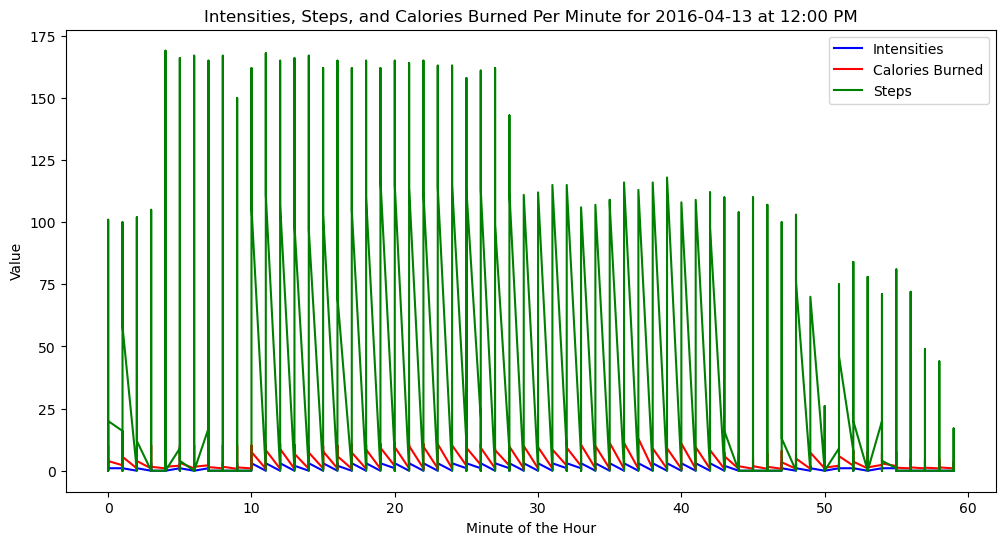

In [79]:
# hourly_data is filtered correctly and contains columns ['minute', 'intensities', 'calories', 'steps']
plt.figure(figsize=(12, 6))

# Plotting intensities
plt.plot(hourly_data['minute'], hourly_data['intensities'], label='Intensities', color='blue')

# Plotting calories on the same graph
plt.plot(hourly_data['minute'], hourly_data['calories'], label='Calories Burned', color='red')

# Plotting steps on the same graph
plt.plot(hourly_data['minute'], hourly_data['steps'], label='Steps', color='green')

plt.xlabel('Minute of the Hour')
plt.ylabel('Value')
plt.title('Intensities, Steps, and Calories Burned Per Minute for 2016-04-13 at 12:00 PM')
plt.legend()
plt.show()


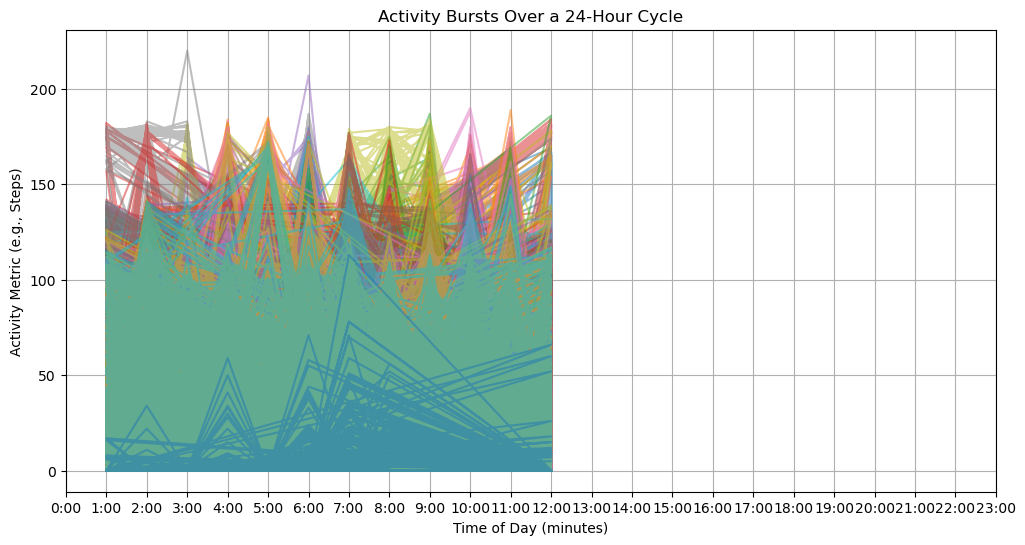

In [86]:
# Convert 'activitytime' to a minute-of-day format.
df['minute_of_day'] = (pd.to_datetime(df['activitytime']).dt.hour * 60) + pd.to_datetime(df['activitytime']).dt.minute

plt.figure(figsize=(12, 6))
for date in df['activityday'].unique():
    daily_data = df[df['activityday'] == date]
    plt.plot(daily_data['minute_of_day'], daily_data['steps'], alpha=0.5)  # Adjust alpha for transparency

plt.xlabel('Time of Day (minutes)')
plt.ylabel('Activity Metric (e.g., Steps)')
plt.title('Activity Bursts Over a 24-Hour Cycle')
plt.xticks(range(0, 1440, 60), labels=[f'{hour}:00' for hour in range(24)])  # Adjusting x-axis ticks for readability
plt.grid(True)
plt.show()


Text(0.5, 0, 'Time of Day')

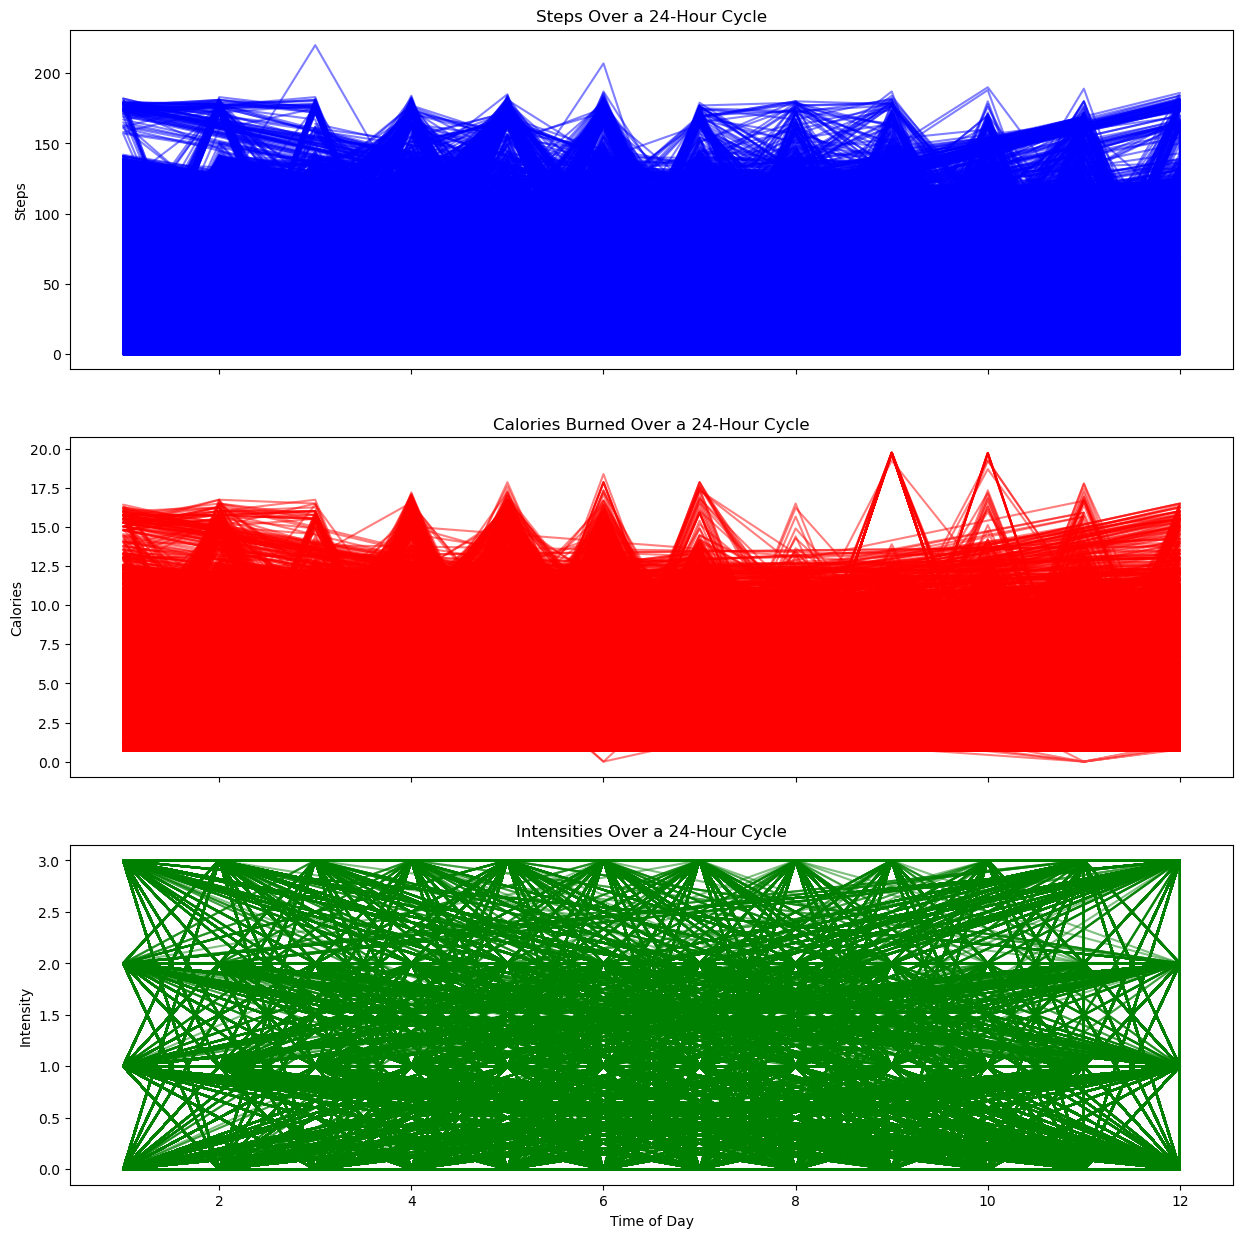

In [88]:
# Adjust the parameters to prevent the error
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust this value as needed, depending on your data size
plt.rcParams['path.simplify_threshold'] = 1.0/9.0

# Convert timestamps to appropriate datetime format if necessary
df['timestamp'] = pd.to_datetime(df['activitytime']).dt.hour

# Plot each activity metric in a separate subplot
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plot steps
axs[0].plot(df['timestamp'], df['steps'], color='blue', alpha=0.5)
axs[0].set_title('Steps Over a 24-Hour Cycle')
axs[0].set_ylabel('Steps')

# Plot calories
axs[1].plot(df['timestamp'], df['calories'], color='red', alpha=0.5)
axs[1].set_title('Calories Burned Over a 24-Hour Cycle')
axs[1].set_ylabel('Calories')

# Plot intensities
axs[2].plot(df['timestamp'], df['intensities'], color='green', alpha=0.5)
axs[2].set_title('Intensities Over a 24-Hour Cycle')
axs[2].set_ylabel('Intensity')
axs[2].set_xlabel('Time of Day')

In [89]:
# Improve layout
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

Conclusion:

To sum up, the knowledge obtained from applying EDA to the physical activity dataset highlights the complexity and diversity of fitness tracking information.

They demonstrate how these analytics can help guide better decisions about exercise and health, both individually and within programs.

Individuals and health professionals can customize techniques to optimize health advantages, promote consistency in physical activity, and eventually develop a more active and healthier society by comprehending the subtleties of physical activity patterns.